# Data Analysing of Biodiversity  - Data Visualisation Portfolio Project

This project is to analyse a dataset from National Parks Service about endangered species in different parks. The dataset consists of a collection of various species and their information. The purpose of this analysis is to analyse the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered.

The dataset was cleaned and preprocessed for ease of analysis and is available under an open license for research and data analysis purposes. The dataset is provided from the Codecademy Business Intelligence Data Analyst Course. We will be using Python to analyze the dataset and a series of visualisations such as pandas, seaborn, matplotlib and SciPy libraries to answer the following questions:

1. Are certain types of species more likely to be endangered?
2. How does the number of observations play a role in the conservation of status?
3. What species is spotted the most in each park?
4. Are the differences between animal category and their conservation status significant?
5. Which species is considered the most endangered?

## Import Libraries

In [12]:
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from matplotlib import pyplot as plt 
from scipy.stats import chi2_contingency

species_info_df = pd.read_csv('species_info.csv')
observations_df = pd.read_csv('observations.csv')

## Load and Inspect Data

In [13]:
species_info_df.info()
species_info_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


The dataset contains 5823 rows and 4 columns containing information on various species. The conservation status column seems to have null values which will be replaced in the later section.

Here's a quick summary of the columns:

- **category**: Class of animal
- **scientific_name**: The scientific name of each species
- **common_name**: The common names of each species
- **conservation_status**: Each species’ current conservation status

In [14]:
observations_df.info()
observations_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


The dataset contains 23296 rows and 3 columns containing scientific names of the different species and the place of observations. Fortunately, none of the columns seem to have any null values.

Here's a quick summary of the columns:

- **scientific_name**: The scientific name of each species
- **park_name**: Park where species were found
- **observations**: The number of times each species was observed at park

## Data Cleaning and Preparation  

Firstly, the null values in the conservation status column is replaced with 'Not of Concern' for easier visualisation.

In [15]:
species_info_df.conservation_status.fillna(value = 'Not of Concern', inplace = True)
species_info_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not of Concern
1,Mammal,Bos bison,"American Bison, Bison",Not of Concern
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not of Concern
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not of Concern
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not of Concern


Next, we merge the two DataFrames into one.

In [16]:
biodiversity = pd.merge(species_info_df, observations_df, how = 'left')
biodiversity.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not of Concern,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not of Concern,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not of Concern,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not of Concern,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",Not of Concern,Yosemite National Park,128


In [17]:
biodiversity.describe(include='all')

,category,scientific_name,common_names,conservation_status,park_name,observations
count,25632,25632,25632,25632,25632,25632.000000
unique,7,5541,5504,5,4,NaN
top,Vascular Plant,Castor canadensis,Dicranum Moss,Not of Concern,Bryce National Park,NaN
freq,19560,36,28,24752,6408,NaN
mean,NaN,NaN,NaN,NaN,NaN,142.214693
std,NaN,NaN,NaN,NaN,NaN,69.912475
min,NaN,NaN,NaN,NaN,NaN,9.000000
25%,NaN,NaN,NaN,NaN,NaN,86.000000
50%,NaN,NaN,NaN,NaN,NaN,124.000000
75%,NaN,NaN,NaN,NaN,NaN,195.000000


The table above shows a sumamry statistic of all the column variables in the 'biodiversity' DataFrame. The category column has 7 unique values. Vascular Plants seem to have the highest value count with 19560. The distribution of the categories will be shown in the next section. The table also indicates that there are 5541 different types of species in the dataset with 'Castor canadensis' having the most value count. There are also 5 different conservation statuses and 4 different parks. The observation column shows that the average number of observation is approximately 142.2 with a standard deviation of 69.9. The minimum and maximum number of observations are 9 to 321 respectively. 

In [50]:
# To add value labels on graph
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1000, y[i], ha = 'center')

## Data Visualisations

### Data Question 1: Are certain types of species more likely to be endangered?

In [18]:
# DataFrame of species that are under conservation
concerned = species_info_df[species_info_df['conservation_status'] !=  'Not of Concern'].reset_index()
concerned.head()

,index,category,scientific_name,common_names,conservation_status
0,7,Mammal,Canis latrans,Coyote,Species of Concern
1,8,Mammal,Canis lupus,Gray Wolf,Endangered
2,9,Mammal,Canis rufus,Red Wolf,Endangered
3,29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
4,30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern


In [75]:
# Initial conservation status count
status = biodiversity.conservation_status.value_counts().rename_axis('Status').reset_index(name='Count')
status

,Status,Count
0,Not of Concern,24752
1,Species of Concern,732
2,Endangered,80
3,Threatened,44
4,In Recovery,24


In [78]:
# Initial category count
category = concerned.category.value_counts().rename_axis('Category').reset_index(name = 'Count')
category

,Category,Count
0,Bird,79
1,Vascular Plant,46
2,Mammal,38
3,Fish,11
4,Amphibian,7
5,Reptile,5
6,Nonvascular Plant,5


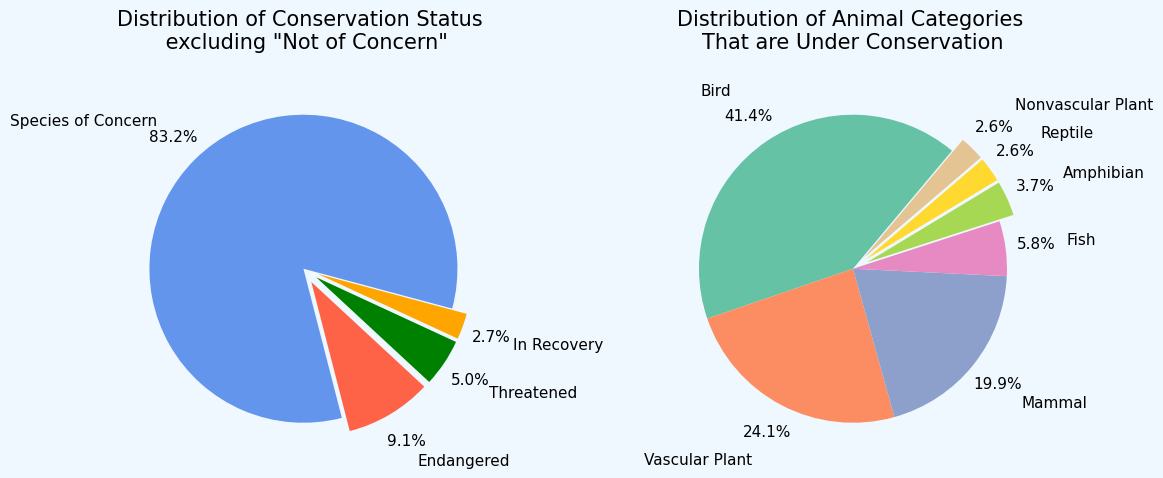

In [94]:
# Plotting pie chart for conservation status and category
fig = plt.figure(facecolor = 'aliceblue', figsize = (13, 5))

plt.subplot(1,2,1)
plt.pie(x = status.Count[1:5], labels = status.Status[1:5], autopct = '%1.1f%%', colors = ['cornflowerblue', 'tomato', 'green', 'orange'],
        startangle = -15, pctdistance = 1.2, textprops={'fontsize': 11}, explode = [0,0.1,0.1,0.1], labeldistance = 1.35)
plt.title('Distribution of Conservation Status \n excluding "Not of Concern"', size = 15, y = 1.05)

plt.subplot(1,2,2)
plt.pie(x = category.Count, labels = category.Category, autopct = '%1.1f%%', pctdistance = 1.2, labeldistance = 1.4, textprops={'fontsize': 11}
       , explode = [0,0,0,0,0.1,0.1,0.1], startangle = 50, colors = sns.color_palette("Set2"))
plt.title('Distribution of Animal Categories \nThat are Under Conservation', y = 1.05, size = 15)
plt.show()

The pie charts above show the distribution of conservation status and animal categories. There are 4 different conservation status excluding 'Not of Concern'; Species of Concern, In Recovery, Threatened and Endangered. A large portion of species in this dataset are in the 'Not of Concern' status, hence it is not included in the pie chart since it would make the other status insignificant. It seems that the majority of the species is under the 'Species of Concern' status approximately 84%, followed by the 'Endangered' status with 8.4%. The 'Threatened' and 'In Recovery' status only consists 5.2% and 2.1% respectively. The pie chart on the right shows that birds comprise approximately 41.4% of the animals under conservation followed by vascular plants and mammals with 24.1% and 19.9% respectively. Amphibians and fish only comprise an estimate of 5.8% and 3.7% respectively. Lastly, nonvascular plants and reptiles have the lowest proportion with 2.6%.

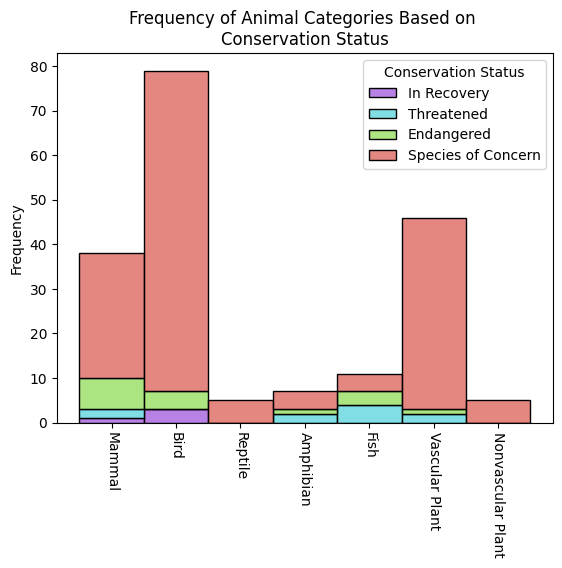

In [22]:
# Plotting histogram of conservation status
sns.histplot(data = concerned, x = 'category', hue = 'conservation_status', palette = sns.color_palette("hls", 4), multiple="stack")
plt.legend(title = 'Conservation Status', labels = ['In Recovery', 'Threatened', 'Endangered', 'Species of Concern'])
plt.xticks(rotation = -90)
plt.title('Frequency of Animal Categories Based on \nConservation Status')
plt.ylabel('Frequency')
plt.xlabel('')
plt.show()

Surprisingly, birds have the highest frequency for species under conservation with approximately 79, even though there are significantly more vascular plants. There is a signifcant number of vascular that are also in concern, approximately 42. From the figure, it is clear that most animals in the mammal, bird and vascular plant category are under the 'Species of Concern' status. For the reptiles and nonvascular plants that are under conservation, all of them are species of concern. There are a few mammal species that are endangered and a small number which are threatened. There is also a a small group of mammals that are in recovery. There is also a small portion of birds that are endangered and in recovery. Amphibians and fish have a small number of species that are in concern, endangered and threatened, with a total of 8 and 10 species respectively. 

###  Data Question 2: How does the number of observations play a role in the conservation of status?

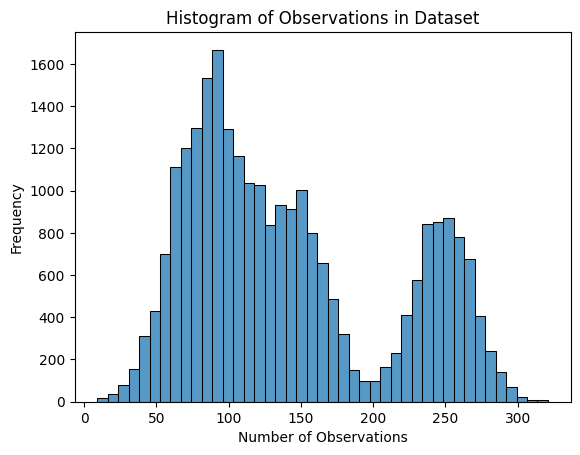

In [23]:
# Plotting histogram for number of observations
sns.histplot(data = biodiversity, x = 'observations')
plt.title('Histogram of Observations in Dataset')
plt.xlabel('Number of Observations')
plt.ylabel('Frequency')
plt.show()

The figure above shows that distribution of the number of observations which ranges from approximately 10 to 330 observations. The graph signifies bimodal distribution which means there are two peaks; approximately at 90 and 250 observations. Around 90 to 100 observations, the frequency peaks at around 1700 and around 250 to 260 observations, there are approximately 900 counts. There is also another minor peak that can be seen around 160 observations. 

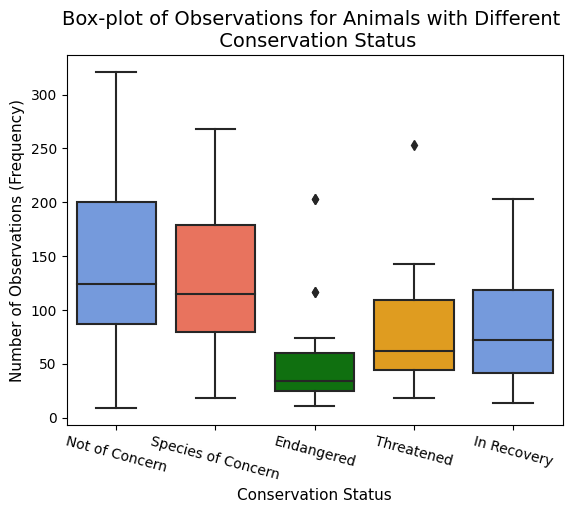

In [24]:
# Plotting box-plot of number of observations for each conservation status
sns.boxplot(data = biodiversity, x = 'conservation_status', y = 'observations', palette = ['cornflowerblue', 'tomato', 'green', 'orange'], order = status.Status)
plt.xticks(rotation = -15)
plt.xlabel('Conservation Status', fontsize = 11)
plt.ylabel('Number of Observations (Frequency)', fontsize = 11)
plt.title('Box-plot of Observations for Animals with Different \n Conservation Status', fontsize = 14)
plt.show()

The box-plot above displays the number of observations for different conservation status. The lowest number of observations for each conservation status is roughly the same with an estimate of 10 to 20 observations. The 'Not of Concern' status has the highest number of observations at approximately 330. This is not a surprise since a large majority of species is under this status. The box length of this status is also the largest which means that the distribution of observations is fairly spread out from 90 to 200. The 'Species of Concern' status has the second highest number of observation at 270 observations. The median number of observations for both 'Species of Concern' and 'Not of Concern' status is fairly close, around 120 to 130 observations. The 'Endangered' status has the lowest dispersion of observations since it has the shortest box length. There also seems to have two outliers present at approximately 120 and 200 observations. This status also has the lowest number of observations at approximately 70. The 'Threatened' status also has an outlier at 250 observations. The 'In Recovery' status has a slightly larger distribution of observations that the treatened species. 

In [95]:
observation_count = 0
most_observed_species = ''
common_name = ''

for i in status.Status:
    for n in range(0, len(biodiversity)):
        if biodiversity.conservation_status[n] == i and biodiversity.observations[n] > observation_count:
            observation_count = biodiversity.observations[n]
            most_observed_species = biodiversity.scientific_name[n]
            common_name = biodiversity.common_names[n]

    print('The most observed species that is {status} is'.format(status = i), most_observed_species + ', also known as {common} with {count} observations.'.format(common = common_name, count = observation_count))
    observation_count = 0

The most observed species that is Not of Concern is Lycopodium tristachyum, also known as Deep-Root Clubmoss, Ground Cedar with 321 observations.
The most observed species that is Species of Concern is Bazzania nudicaulis, also known as Bazzania with 268 observations.
The most observed species that is Endangered is Canis lupus, also known as Gray Wolf with 203 observations.
The most observed species that is Threatened is Oncorhynchus mykiss, also known as Rainbow Trout with 253 observations.
The most observed species that is In Recovery is Canis lupus, also known as Gray Wolf, Wolf with 203 observations.


###  Data Question 3: What species is spotted the most in each park?

In [38]:
# Initial park observations count
park_observations = observations_df.groupby('park_name').observations.sum().sort_values(ascending = False).reset_index()
park_observations

,park_name,observations
0,Yellowstone National Park,1443562
1,Yosemite National Park,863332
2,Bryce National Park,576025
3,Great Smoky Mountains National Park,431820


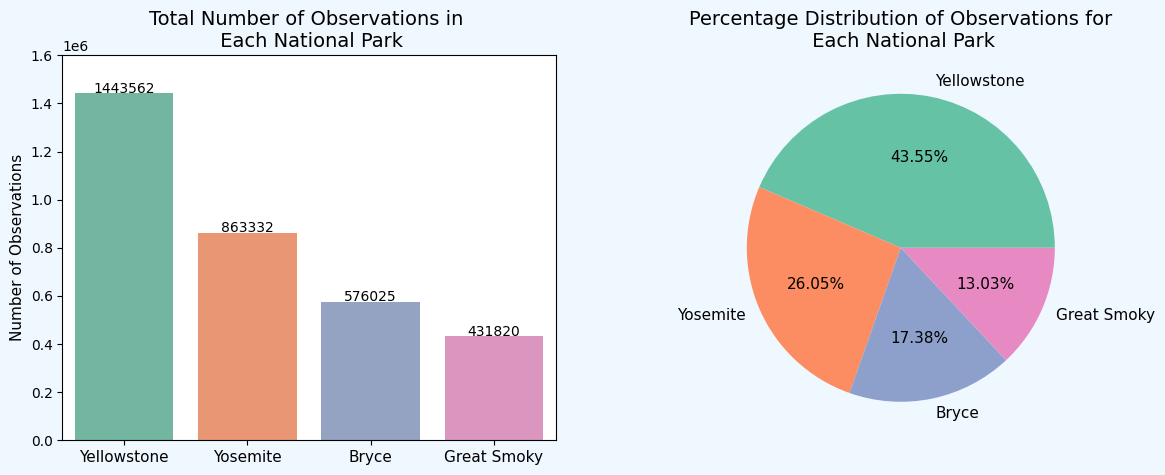

In [51]:
# Plotting figure for number of observations in each park
fig = plt.figure(facecolor = 'aliceblue', figsize = (14, 5))
park_labels = ['Yellowstone', 'Yosemite', 'Bryce', 'Great Smoky']

plt.subplot(1,2,1)
ax = sns.barplot(data = park_observations, x = 'park_name', y= 'observations', ci = None, palette = sns.color_palette("Set2"))
plt.ylabel('Number of Observations', fontsize = 11)
plt.xlabel('', fontsize = 12)
ax.set_xticklabels(labels = park_labels, fontsize = 11)
addlabels(park_observations.park_name, park_observations.observations)
plt.yticks(np.arange(0, 1.8e6, step=0.2e6))
plt.title('Total Number of Observations in \n Each National Park', fontsize = 14)

plt.subplot(1,2,2)
plt.pie(x = park_observations.observations, labels = park_labels, autopct = '%1.2f%%', textprops={'fontsize': 11}, colors = sns.color_palette("Set2"))
plt.title('Percentage Distribution of Observations for\n Each National Park', fontsize = 14)
plt.show()

Yellowstone National Park has the highest number of observations with a total of 1443562 observations. It accounts for nearly half of all observations, approximately 43.55%. Yosemite National Park has the second highest number of observations with 863332 observations and accounting for 26.05%. Bryce National Park and Great Smoky Mountains National Park have a total of 576025 and 431820 observations respectively.  

In [112]:
# Finding species with most observations 
most_observed = biodiversity.groupby('scientific_name').observations.sum().sort_values(ascending = False).reset_index()
most_observed.head(10)

,scientific_name,observations
0,Streptopelia decaocto,5355
1,Holcus lanatus,5340
2,Castor canadensis,5175
3,Hypochaeris radicata,5160
4,Puma concolor,5133
5,Procyon lotor,5076
6,Columba livia,4959
7,Myotis lucifugus,4641
8,Bidens tripartita,2592
9,Oxalis dillenii,2552


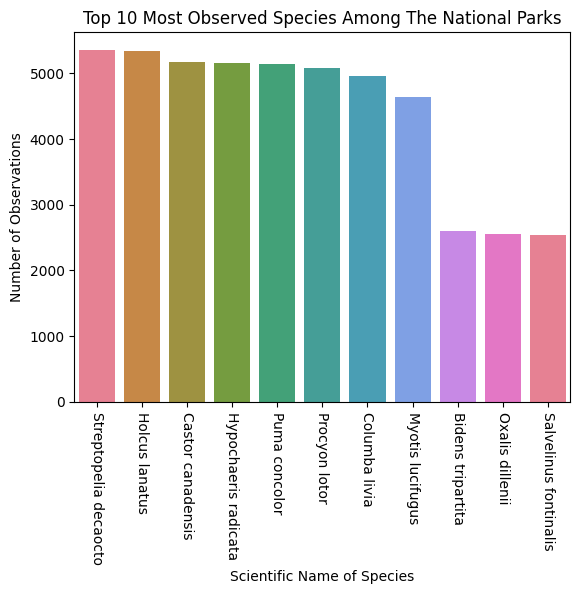

In [118]:
# Plotting bar charts of top 10 most observed species
color_palette = sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.barplot(data = most_observed[0:11], x = 'scientific_name', y = 'observations', palette = sns.color_palette("husl", 10))
plt.xticks(rotation = -90)
plt.xlabel('Scientific Name of Species')
plt.ylabel('Number of Observations')
plt.title('Top 10 Most Observed Species Among The National Parks')
plt.show()

The bar chart above shows the top 10 most observed species among the four national parks. Streptopelia decaocto has the most observations at 5355 observations, followed by Holcus lanatus with 5340 observations. The number of observations for the bottom 3 species drop signficantly to below 3000. After Myotis lucifugus, the number of observations drops significantly from 4641 to 2592 observations.

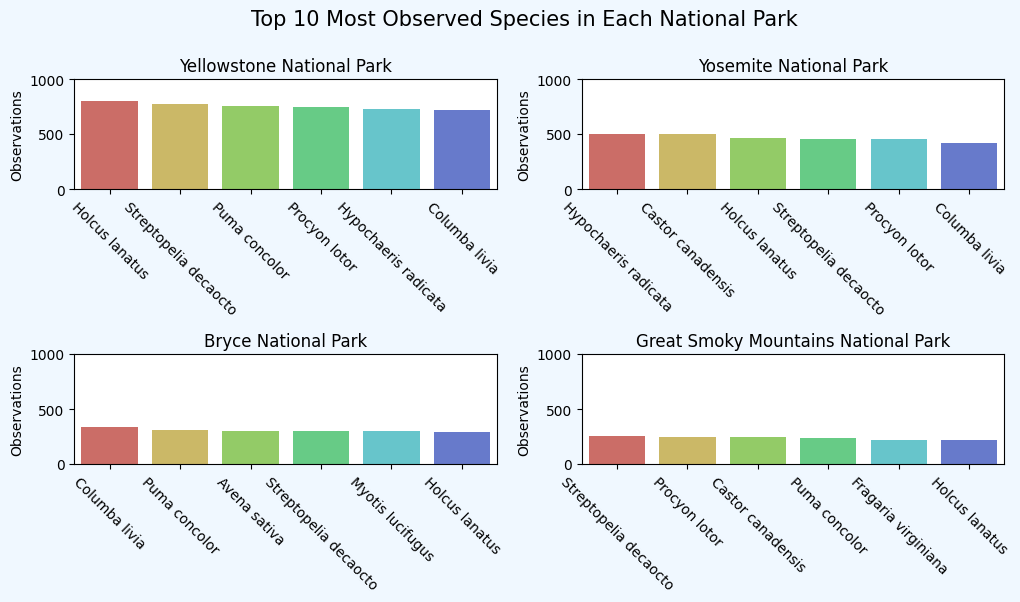

In [68]:
# Plotting bar charts of most observed species in each park
index = 1
fig = plt.figure(facecolor = 'aliceblue', figsize = (12, 5))
fig.suptitle("Top 10 Most Observed Species in Each National Park", fontsize = 15, y = 1.02)

for name in park_observations.park_name:
    df = observations_df[observations_df['park_name'] == name]
    df_observed = df.groupby('scientific_name').observations.sum().sort_values(ascending = False).reset_index()
    plt.subplots_adjust(wspace=0.2, hspace=1.5)
    plt.subplot(2,2,index)
    sns.barplot(data = df_observed[0:6], x = 'scientific_name', y = 'observations', palette = sns.color_palette("hls", 8))
    plt.title(name)
    plt.xticks(rotation = -45)
    plt.xlabel('')
    plt.ylabel('Observations')
    plt.yticks(np.arange(0, 1100, step=500))
    index += 1
   
plt.show()

The bar charts above shows the most observed species in each national park. For Yellowstone and Yosemite National Park, Holcus lanatus and Hypochaeris radicata have the most observations with approximately 750 and 500 observations respectively. Columba livia and Streptopelia decaocto  have the highest number of observations in Bryce and Great Smoky Mountains National Park respectively. 

### Data Question 4: Are the differences between animal category and their conservation status significant?

In [55]:
# Cross-tab table between conservation status and category
category_status = pd.crosstab(species_info_df.category, species_info_df.conservation_status)
category_status

conservation_status,Endangered,In Recovery,Not of Concern,Species of Concern,Threatened
category,,,,,
Amphibian,1,0,73,4,2
Bird,4,3,442,72,0
Fish,3,0,116,4,4
Mammal,7,1,176,28,2
Nonvascular Plant,0,0,328,5,0
Reptile,0,0,74,5,0
Vascular Plant,1,0,4424,43,2


In [56]:
# Finding chi2 and p-value 
chi2, pval, dof, expected = chi2_contingency(category_status)
print('Chi-square Statistic:', chi2)
print('P-value:', pval)

Chi-square Statistic: 628.581965798279
P-value: 2.4551423165990197e-117


The p-value is extremely small with a value of 2.45e-117. From the Chi-squared value and p-value, it signifies that the relationship between animal category and conservation status is insignifcant and that they are independent from each other.

### Data Question 5: Which species is considered the most endangered?

The method we will be using to determine which species is the most endangered is by finding the species with the least number of observations. 

In [166]:
least_observed = biodiversity.groupby(['category','scientific_name','common_names','conservation_status']).observations.sum().sort_values(ascending = True).reset_index()
least_observed.head(10)

,category,scientific_name,common_names,conservation_status,observations
0,Bird,Grus americana,Whooping Crane,Endangered,131
1,Mammal,Canis rufus,Red Wolf,Endangered,137
2,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Endangered,141
3,Fish,Noturus baileyi,Smoky Madtom,Endangered,143
4,Amphibian,Rana sierrae,Sierra Nevada Yellow-Legged Frog,Endangered,144
5,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,145
6,Fish,Chasmistes liorus,June Sucker,Endangered,146
7,Bird,Picoides borealis,Red-Cockaded Woodpecker,Endangered,146
8,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,153
9,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered,153


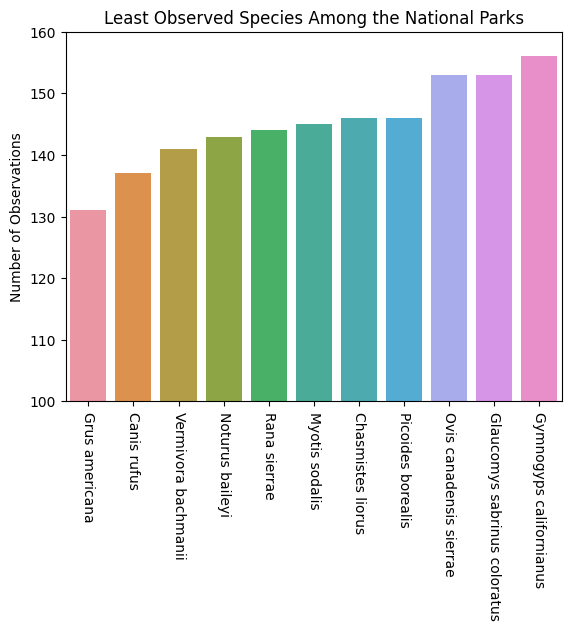

In [164]:
sns.barplot(data = least_observed[0:11], x = 'scientific_name', y = 'observations')
plt.xticks(rotation = -90)
plt.ylim(100,160)
plt.xlabel('')
plt.ylabel('Number of Observations')
plt.title('Least Observed Species Among the National Parks')
plt.show()

From the figure above, Grus americana has the least number of observations with a total of only 131 observations. This species is a type of bird that is commonly known as Whooping Crane. Next is the Canis rufus which is a Red Wolf, with 137 observations. The third lowest number of observations is a bird called Vermivora bachmanii, also known as Bachman's Wood Warbler. Most of these animals only have observations less than 160 which is significantly little in comparison.

## Conclusion

The purpose of this project is to analyse and interpret data to identify any trends or relationships among species and their conservation status. A finding that was discovered during this analysis was that the main cateogry of animal that is under conservation is birds approximately 41.4%, followed by vascular plants and mammals. Majority of species under conservation are in the 'Species of Concern' status. It was also found that Yellowstone National Park has the highest number of observations with a total of approximately 1.4 million observations which is significantly higher than the other 3 national parks. The most observed species in this park is Holcus lanatus with 800 observations and the least observed species is the Grus amerciana with only 131 observations. Lastly, it was also found that there is no signficant dependency between animal category and conservation status. This means that a species' animal category does not increase their risk of being endangered. I hope that this analysis has given an insight into the conservation of various species. 